In [53]:
# Assignment 2: Linear Models and Validation Metrics (30 marks total)
### Due: October 10 at 11:59pm

### Name: Nick Nikolov

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (14.5 marks total)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [54]:
import numpy as np
import pandas as pd


### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [55]:
# TO DO: Import spam dataset from yellowbrick library
from yellowbrick.datasets import load_spam
# TO DO: Print size and type of X and y
X, y = load_spam()

print(X.shape)
print(X.dtypes)
print(y.shape)
print(y.dtypes)

(4600, 57)
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
w

### Step 2: Data Processing (1.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [56]:
# TO DO: Check if there are any missing values and fill them in if necessary
nulls = X.isnull().sum().sort_values(ascending=False)
print(nulls)

nulls = y.isnull().sum()
print(nulls)

word_freq_make                0
word_freq_labs                0
word_freq_857                 0
word_freq_data                0
word_freq_415                 0
word_freq_85                  0
word_freq_technology          0
word_freq_1999                0
word_freq_parts               0
word_freq_pm                  0
word_freq_direct              0
word_freq_cs                  0
word_freq_meeting             0
word_freq_original            0
word_freq_project             0
word_freq_re                  0
word_freq_edu                 0
word_freq_table               0
word_freq_conference          0
char_freq_;                   0
char_freq_(                   0
char_freq_[                   0
char_freq_!                   0
char_freq_$                   0
char_freq_#                   0
capital_run_length_average    0
capital_run_length_longest    0
word_freq_telnet              0
word_freq_lab                 0
word_freq_address             0
word_freq_650                 0
word_fre

For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **5%** of the data.

In [57]:
# TO DO: Create X_small and y_small 
from sklearn.model_selection import train_test_split

_, X_small, _, y_small = train_test_split(X, y, test_size=0.05, random_state=0)

Xsmall_train, Xsmall_test, ysmall_train, ysmall_test = train_test_split(X_small, y_small, test_size=0.2, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X[['word_freq_make', 'word_freq_address']], y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Step 3: Implement Machine Learning Model
1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Using full X and y dataset
full_data = LogisticRegression(max_iter=2000)
full_data.fit(X_train, y_train)
full_predictions = full_data.predict(X_test)

#Using only 5% of the data
small_data = LogisticRegression(max_iter=2000)
small_data.fit(Xsmall_train, ysmall_train)
small_predictions = small_data.predict(Xsmall_test)

#Using the first two columns of X and y
first2 = LogisticRegression(max_iter=2000)
first2.fit(X2_train, y2_train)
first2_predictions = first2.predict(X2_test)

### Step 4: Validate Model

Calculate the training and validation accuracy for the three different tests implemented in Step 3

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [163]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
results = pd.DataFrame(columns=['Data Size', 'Training Accuracy', 'Validation Accuracy'])

from sklearn.model_selection import cross_validate
scores_full = cross_validate(full_data, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
row = [X.size]

for label_pair in [ ('train_score', 'train_score'), ('test_score', 'validation_score')]:
    row.append(scores_full[label_pair[0]].mean())

results.loc[len(results.index)] = row
    
    
scores_small = cross_validate(small_data, Xsmall_train, ysmall_train, cv=5, scoring='accuracy', return_train_score=True)
row = [X_small.size]
    
for label_pair in [ ('train_score', 'train_score'), ('test_score', 'validation_score')]:
    row.append(scores_small[label_pair[0]].mean())
results.loc[len(results.index)] = row

    
scores_first2 = cross_validate(first2, X2_train, y2_train, cv=5, scoring='accuracy', return_train_score=True)
row = [X2_test.size]
    
for label_pair in [ ('train_score', 'train_score'), ('test_score', 'validation_score')]:
    row.append(scores_first2[label_pair[0]].mean())
results.loc[len(results.index)] = row

print(results)

# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

   Data Size  Training Accuracy  Validation Accuracy
0   262200.0           0.927785             0.922011
1    13110.0           0.956527             0.902102
2     1840.0           0.615693             0.614402


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I used the sci-kit-learn documentation website to learn about the regression function parameters. I also used lecture & lab slides created by Dr. Dawson.

2. I completed all steps in numerical order.

3. Any time I was stuck on a compilation error I pasted the error message into ChatGPT. If it provided an easy fix, I modified my code accordingly and retested. My prompt was always identical to the error message I received. 

4. Yes I had some challenges with setting up the training and testing data sets. The assignment indicates we need to split the dataset into a smaller dataset containing 5% of the original data. However, there was no further guidance on what data to use for the training / testing of each model. Should we have used 5% of the dataset to train / test all models or only the model that specified 5%?

## Part 2: Regression (10.5 marks total)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps 1-4 from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [131]:
# TO DO: Import spam dataset from yellowbrick library
# TO DO: Print size and type of X and y

from yellowbrick.datasets import load_concrete
# TO DO: Print size and type of X and y
Xc, yc = load_concrete()

print(Xc)
print(Xc.size)
print(Xc.dtypes)
print(yc.size)
print(yc.dtypes)

      cement   slag    ash  water  splast  coarse   fine  age
0      540.0    0.0    0.0  162.0     2.5  1040.0  676.0   28
1      540.0    0.0    0.0  162.0     2.5  1055.0  676.0   28
2      332.5  142.5    0.0  228.0     0.0   932.0  594.0  270
3      332.5  142.5    0.0  228.0     0.0   932.0  594.0  365
4      198.6  132.4    0.0  192.0     0.0   978.4  825.5  360
...      ...    ...    ...    ...     ...     ...    ...  ...
1025   276.4  116.0   90.3  179.6     8.9   870.1  768.3   28
1026   322.2    0.0  115.6  196.0    10.4   817.9  813.4   28
1027   148.5  139.4  108.6  192.7     6.1   892.4  780.0   28
1028   159.1  186.7    0.0  175.6    11.3   989.6  788.9   28
1029   260.9  100.5   78.3  200.6     8.6   864.5  761.5   28

[1030 rows x 8 columns]
8240
cement    float64
slag      float64
ash       float64
water     float64
splast    float64
coarse    float64
fine      float64
age         int64
dtype: object
1030
float64


### Step 2: Data Processing (0.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [61]:
# TO DO: Check if there are any missing values and fill them in if necessary
nulls = Xc.isnull().sum().sort_values(ascending=False)
print(nulls)

nulls = yc.isnull().sum()
print(nulls)

cement    0
slag      0
ash       0
water     0
splast    0
coarse    0
fine      0
age       0
dtype: int64
0


### Step 3: Implement Machine Learning Model (1 mark)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with `X` and `y`

In [88]:
# TO DO: ADD YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=0)


#Using full X and y dataset
linear_modelc = LinearRegression()
linear_modelc.fit(Xc_train, yc_train)
linear_predictionsc = linear_modelc.predict(Xc_test)
training_linear_predictionsc = linear_modelc.predict(Xc_train)
# Note: for any random state parameters, you can use random_state = 0

### Step 4: Validate Model (1 mark)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [73]:
# TO DO: ADD YOUR CODE HERE
from sklearn.metrics import r2_score, mean_squared_error

linearC_R2 = r2_score(yc_test, linear_predictionsc)
linearC_mse = mean_squared_error(yc_test, linear_predictionsc)

print("Linear Regression scores:")
print(f"R2 Error: {linearC_R2}")
print(f"Mean Squared Error: {linearC_mse}")

Linear Regression scores:
R2 Error: 0.6368981103411244
Mean Squared Error: 95.63533482690424


### Step 5: Visualize Results (1 mark)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [119]:
# TO DO: ADD YOUR CODE HERE

resultsC = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy', 'MSE', 'R2'])
resultsC.set_index(['MSE', 'R2'], inplace=True)

validation_linearC_R2 = r2_score(yc_test, linear_predictionsc)
validation_linearC_mse = mean_squared_error(yc_test, linear_predictionsc)

validation_accuracy = {
    'MSE': validation_linearC_mse, 
    'R2': validation_linearC_R2
}

training_linearC_R2 = r2_score(yc_train, training_linear_predictionsc)
training_linearC_mse = mean_squared_error(yc_train, training_linear_predictionsc)

training_accuracy = {
    'MSE': training_linearC_mse, 
    'R2': training_linearC_R2
}

#row = [training_accuracy, validation_accuracy}

print(row)

resultsC.loc[len(resultsC.index)] = row


print(resultsC)

[{'MSE': 110.34550122934108, 'R2': 0.6090710418548884}, {'MSE': 95.63533482690424, 'R2': 0.6368981103411244}]
                                           Training Accuracy  \
[MSE, R2]                                                      
0          {'MSE': 110.34550122934108, 'R2': 0.6090710418...   

                                         Validation Accuracy  
[MSE, R2]                                                     
0          {'MSE': 95.63533482690424, 'R2': 0.63689811034...  


### Questions (2 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?

Using a linear model did not produce good results on this dataset. The R2 value is roughly 60%. This makes sense because thinking from first principles we know that the compressive strength of a material is non-linear. We linear regression is underfitting the data, as shown by the R2 score.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. I used the sci-kit-learn documentation for learning about function parameters. I sourced most of my code from Dr. Dawson labs, lecture slides, and examples. 
2. I completed all steps in numerical order. 
3. I used ChatGPT when stuck on an unclear error message. My prompts were pasting the error message, and asking what could be causing this error. One example of ChatGPT helping me was when trying to figure out why I couldn't use a logistic regression on the concrete data. turns out I was supposed to used a linear regression and I didn't read the homework question correctly. ChatGPT told me the y data was continuous therefore a logistic regression would not work. Then I realized either I was doing something wrong or the question was worded incorrectly. In this case it was my error!

4. BIGGEST CHALLENGE: I didn't read the question correctly!! I kept trying to use logistic regression on the concrete sample and getting stuck. I've no learned to read the homework more thoroughly rather than continue bashing through an error message. 

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

1. In this case a linear regression was not sufficient to appropriately model the data. We can see this by our results of getting a ~60% r2 score. Since material strength for concrete samples will follow first principles of material science, we should be able to model the data more accurately.

Some of the material properties have highly non-linear relationships with the strength vector. As shown below by plotting strength vs age. This clearly does not show a linear relationship. Therefore using a linear regression will not accurately model this data. 

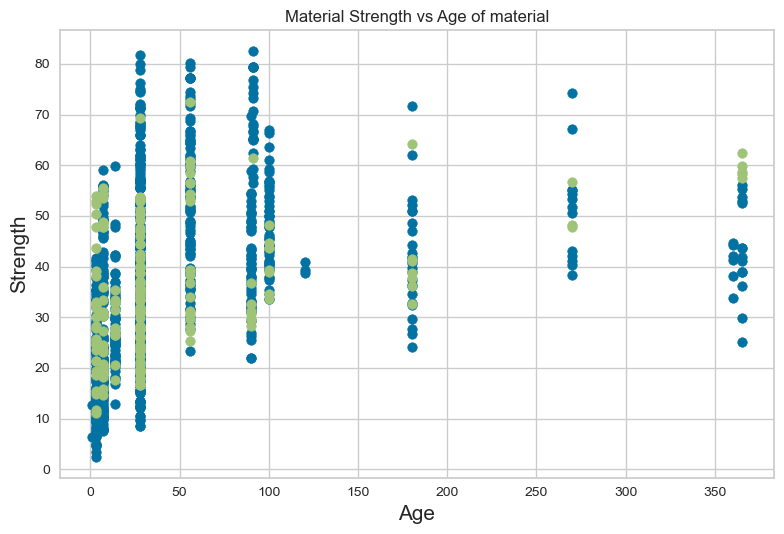

In [161]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Xc.iloc[:,7], yc)
ax.scatter(Xc_test.iloc[:,7], linear_predictionsc)


ax.set_xlabel(r'Age', fontsize=15)
ax.set_ylabel(r'Strength', fontsize=15)
ax.set_title('Material Strength vs Age of material')
ax.grid(True)
fig.tight_layout()

plt.show()

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

## Part 5: Bonus Question (4 marks)

Repeat Part 2 with Ridge and Lasso regression to see if you can improve the accuracy results. Which method and what value of alpha gave you the best R^2 score? Is this score "good enough"? Explain why or why not.

**Remember**: Only test values of alpha from 0.001 to 100 along the logorithmic scale.

In [65]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*

In [66]:
Citations
1. Cranor, Lorrie Faith, and Brian A. LaMacchia. “Spam!.” Communications of the ACM 41.8 (1998): 74-83.
2. Yeh, I-C. “Modeling of strength of high-performance concrete using artificial neural networks.” Cement and Concrete research 28.12 (1998): 1797-1808.
3. Dr. Dawson - Lecture slides
4. https://scikit-learn.org/stable/
5. https://chat.openai.com

SyntaxError: invalid character '“' (U+201C) (4010618075.py, line 2)